In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
daily = pd.read_csv('CBS_2021-2023_Daily_Weather.csv', sep=',')

In [4]:
daily.head(5)

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


# changing date dtype


In [5]:
daily['Date'] = pd.to_datetime(daily['Date'])

In [6]:
daily.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   windspeed_10m_max (km/h)        1095 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 68.6 KB


# check for missing values

In [7]:
# Check for missing values
missing_values = daily.isnull().sum()
missing_values

Casual                            0
Date                              0
Member                            0
Total_rides                       0
apparent_temperature_mean (°C)    0
temperature_2m_mean (°C)          0
weathercode (wmo code)            0
windspeed_10m_max (km/h)          0
dtype: int64

In [9]:
# Handle missing values (if necessary)
# For example, you can drop rows with missing values using df.dropna(), 
# fill missing values with a specific value using df.fillna(), or 
# interpolate missing values using df.interpolate().

# Example of dropping rows with missing values
# df.dropna(inplace=True)
# Example of filling missing values with mean
# df.fillna(df.mean(), inplace=True)

# Example of interpolating missing values
# df.interpolate(method='linear', inplace=True)

# Now, your dataset is cleaned from missing values

# checking for duplicates

In [8]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the data
# Load your dataset into 'df' using pd.read_csv() or any other method

# Check for duplicates
duplicates = daily[daily.duplicated()]

# Print the duplicates (if any)
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicates found.")

No duplicates found.


In [9]:
daily.head(1)

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6


# create year, month and weekday columns

In [10]:
# Extract year, month, and weekday
daily['year'] = daily['Date'].dt.year
daily['month'] = daily['Date'].dt.month_name()
daily['weekday'] = daily['Date'].dt.day_name()  # Monday=0, Sunday=6

In [11]:
daily.head(1)

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),year,month,weekday
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,2021,January,Friday


Text(0, 0.5, 'Number of Rides')

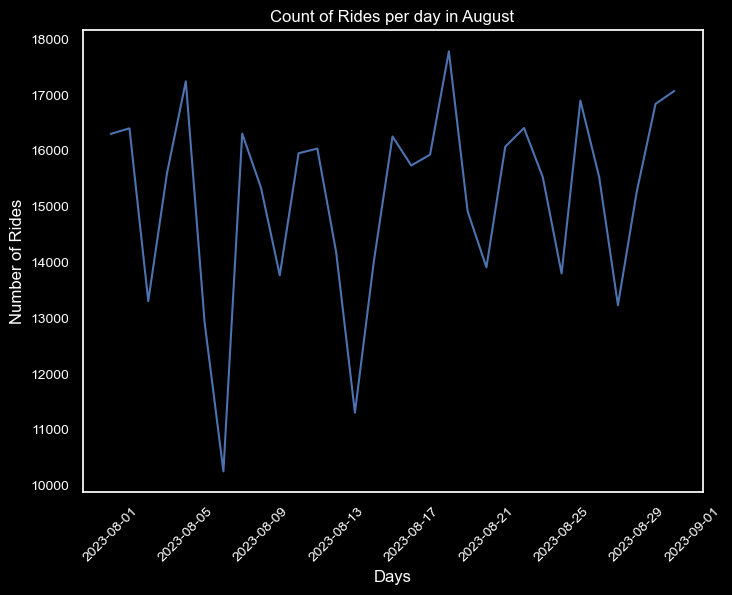

In [23]:
sns.set_theme(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'grid.color': 'black' })
# Filter the DataFrame for a specific month and year
target_year = 2023
target_month = 'August'
filtered_df = daily[(daily['year'] == target_year) & (daily['month'] == target_month)]
plt.figure(figsize=(8, 6))
sns.lineplot(data=filtered_df, x='Date', y='Total_rides')
plt.title(f'Count of Rides per day in {target_month}', color='white')
plt.xticks(fontsize=10, color='white', rotation=45)
plt.yticks(fontsize=10, color='white')
plt.xlabel('Days', color='white')
plt.ylabel('Number of Rides', color='white')
#plt.legend(title='User Type')
#plt.xticks(rotation=0)
#plt.tight_layout()
#plt.show()